#Oasis Infobyte Internship
Task 5: Sales Prediction using Python

Author: Rajnandini

Domain: Data Science

Batch: December-24

#Task 5: Sales Prediction using Python
#Problem Statement
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

#Approach :
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Using Classification
learning algorithms that’s best fit for the above case.

#Procedure :
Step 1 : Import Libraries and Dataset

Step 2 : Data Pre-processing
        1. Data Type and conversion
        2. Removing Irrelevant Columns
        3. Identifying & Treatment Missing Value
        4. Identifying & Treatment Outliers
        5. Descriptive Analysis
        6. Correlation
        
Step 3 : Data Visualization
        
Step 4 : Breaking Data into 2 Parts          
        
Step 5 : Data Partition  

Step 6 : Model Building
        6.1 Logistic Regression

         Conclusion

#Step 1 :- Import Libraries and Dataset

In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt
from PIL import  Image
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go  # Latest package for visualization plotly
import plotly.tools as tls
import plotly.figure_factory as ff

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [11]:
# Linking dataset into colab
import io
imdb_df = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']), encoding='unicode_escape')

In [12]:
#Dataset first Look
imdb_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Dataset last Look
imdb_df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [13]:
imdb_df.shape

(200, 5)

#Step 2 :- Data Pre-Processing
Data Type and conversion Removing Irrelevant Columns Identifying & Treatment Missing Value Identifying & Treatment Outliers Descriptive Analysis Correlation

2.1 Data Type and Conversion

In [14]:
print("Data types:\n", imdb_df.dtypes)

Data types:
 Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


In [15]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


2.2 Removing Irrelevent Columns

In [10]:
imdb_df = imdb_df.drop('TV', axis=1)

2.3 Identifying and Treatment of Missing Values

In [16]:
imdb_df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


2.4 Identifying And Treatment of Outliers

<Axes: >

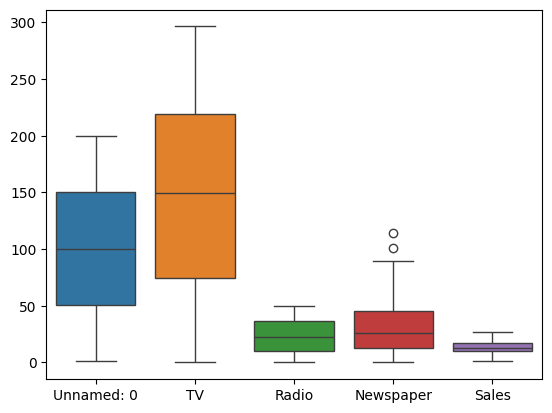

In [17]:
sns.boxplot(data = imdb_df)

2.5 Descriptive Analysis

In [18]:
imdb_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [19]:

Correlation = imdb_df.corr(numeric_only=True)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

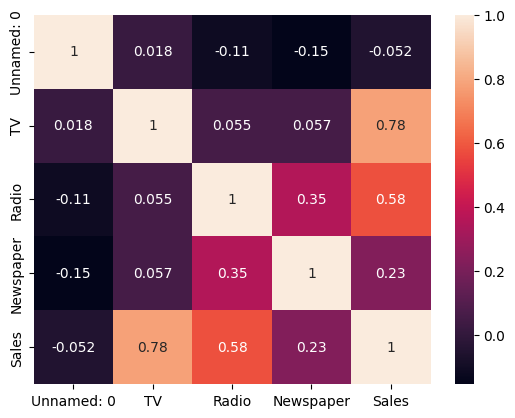

In [20]:
sns.heatmap(imdb_df.corr(numeric_only=True), annot=True)

#Step 3 : Data Visualization

<Axes: ylabel='count'>

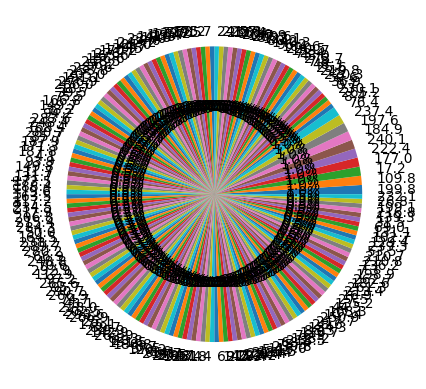

In [25]:
# series of counts
Flower_Class_count = imdb_df.TV.value_counts()
Flower_Class_count.plot.pie(autopct="%.1f%%")

<Axes: xlabel='TV', ylabel='Count'>

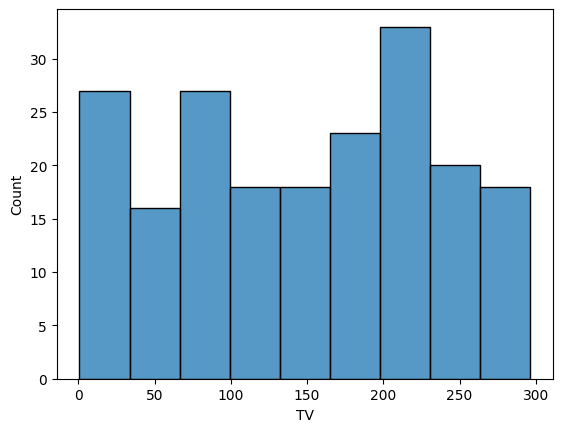

In [27]:
sns.histplot(x='TV',data=imdb_df)

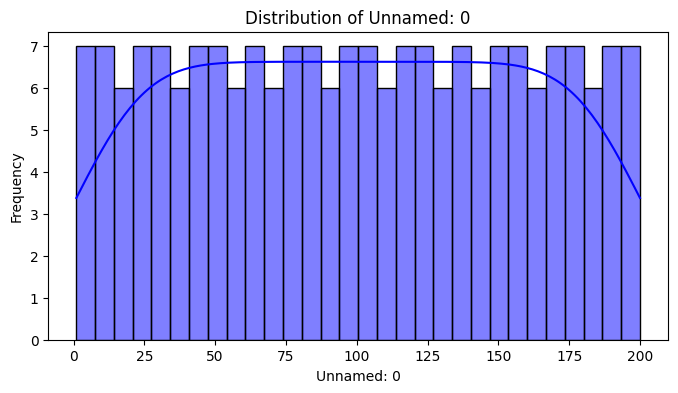

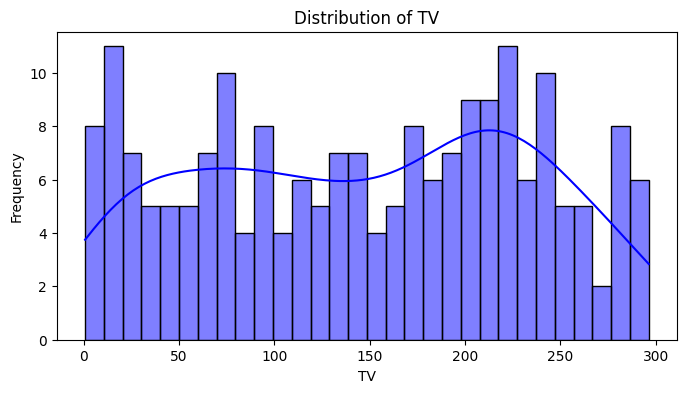

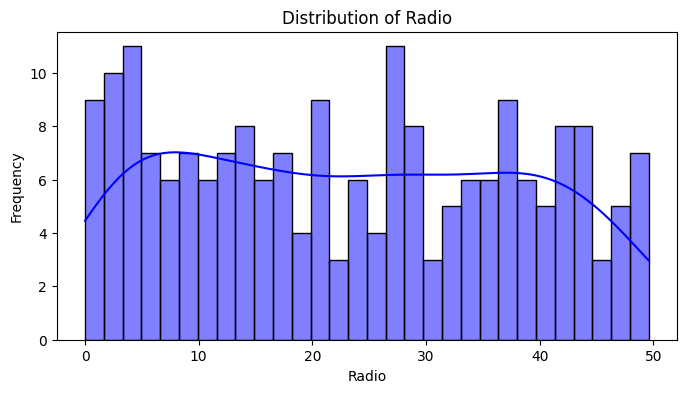

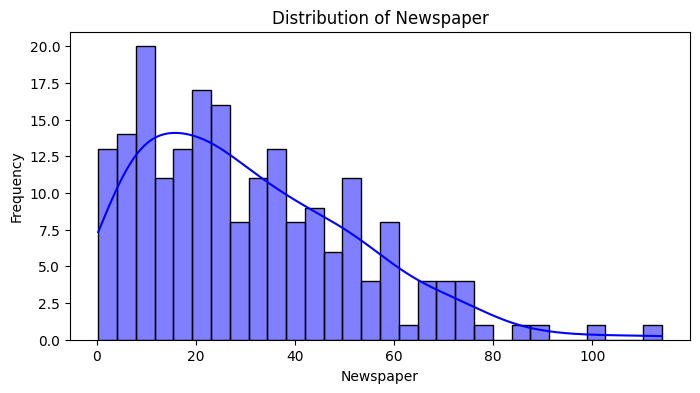

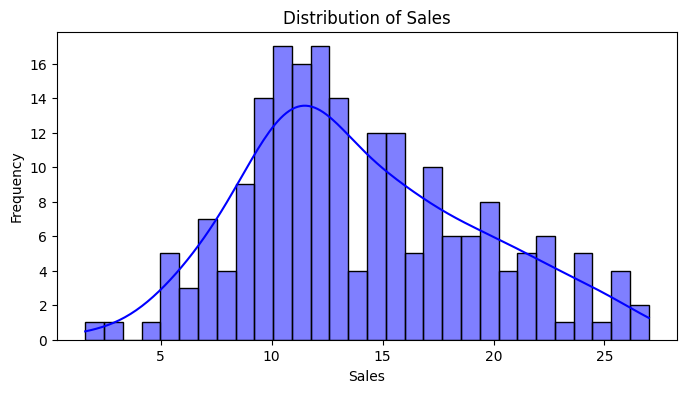

In [28]:
# Univariate Analysis
for col in imdb_df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(imdb_df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

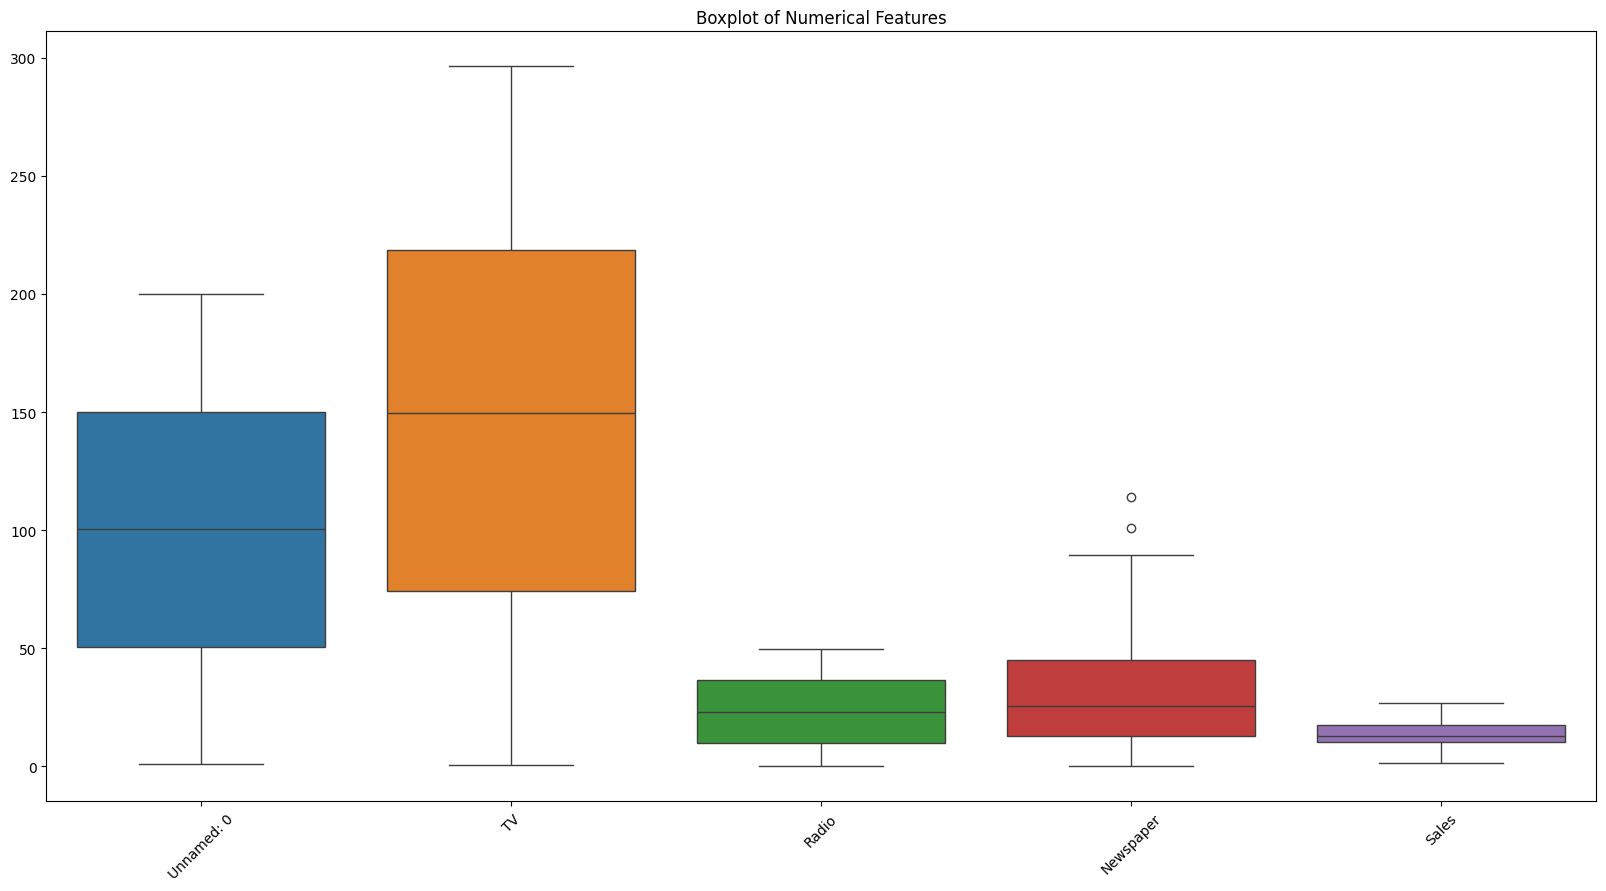

In [29]:
# Boxplot to check outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=imdb_df.select_dtypes(include=np.number))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [30]:
# Barplot for categorical features (if present)
categorical_cols = imdb_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=imdb_df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

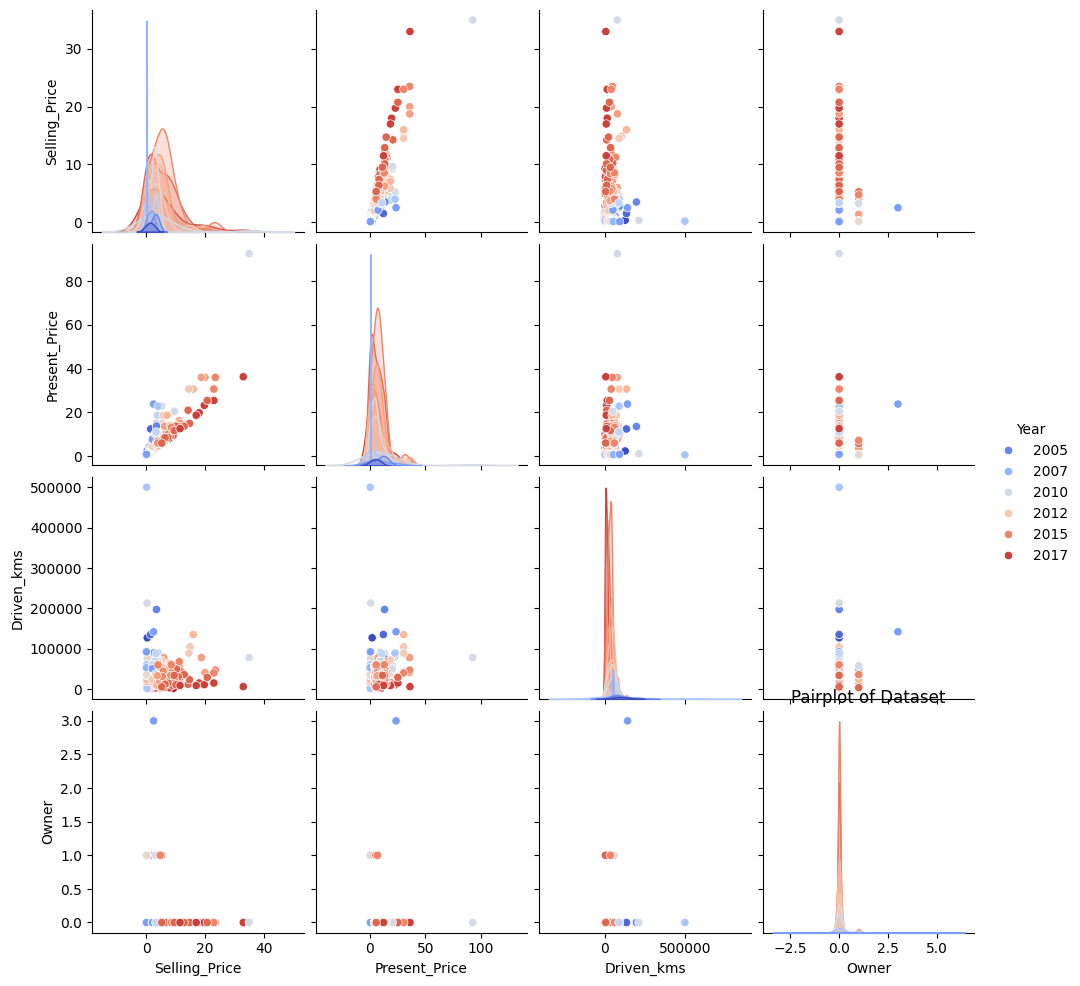

In [ ]:
# Replace 'Actual_Target_Column' with the actual column name in your DataFrame
# For example, if the target column is named 'Region', use:
sns.pairplot(imdb_df, diag_kind='kde', hue='Year', palette="coolwarm")
plt.title("Pairplot of Dataset")
plt.show()

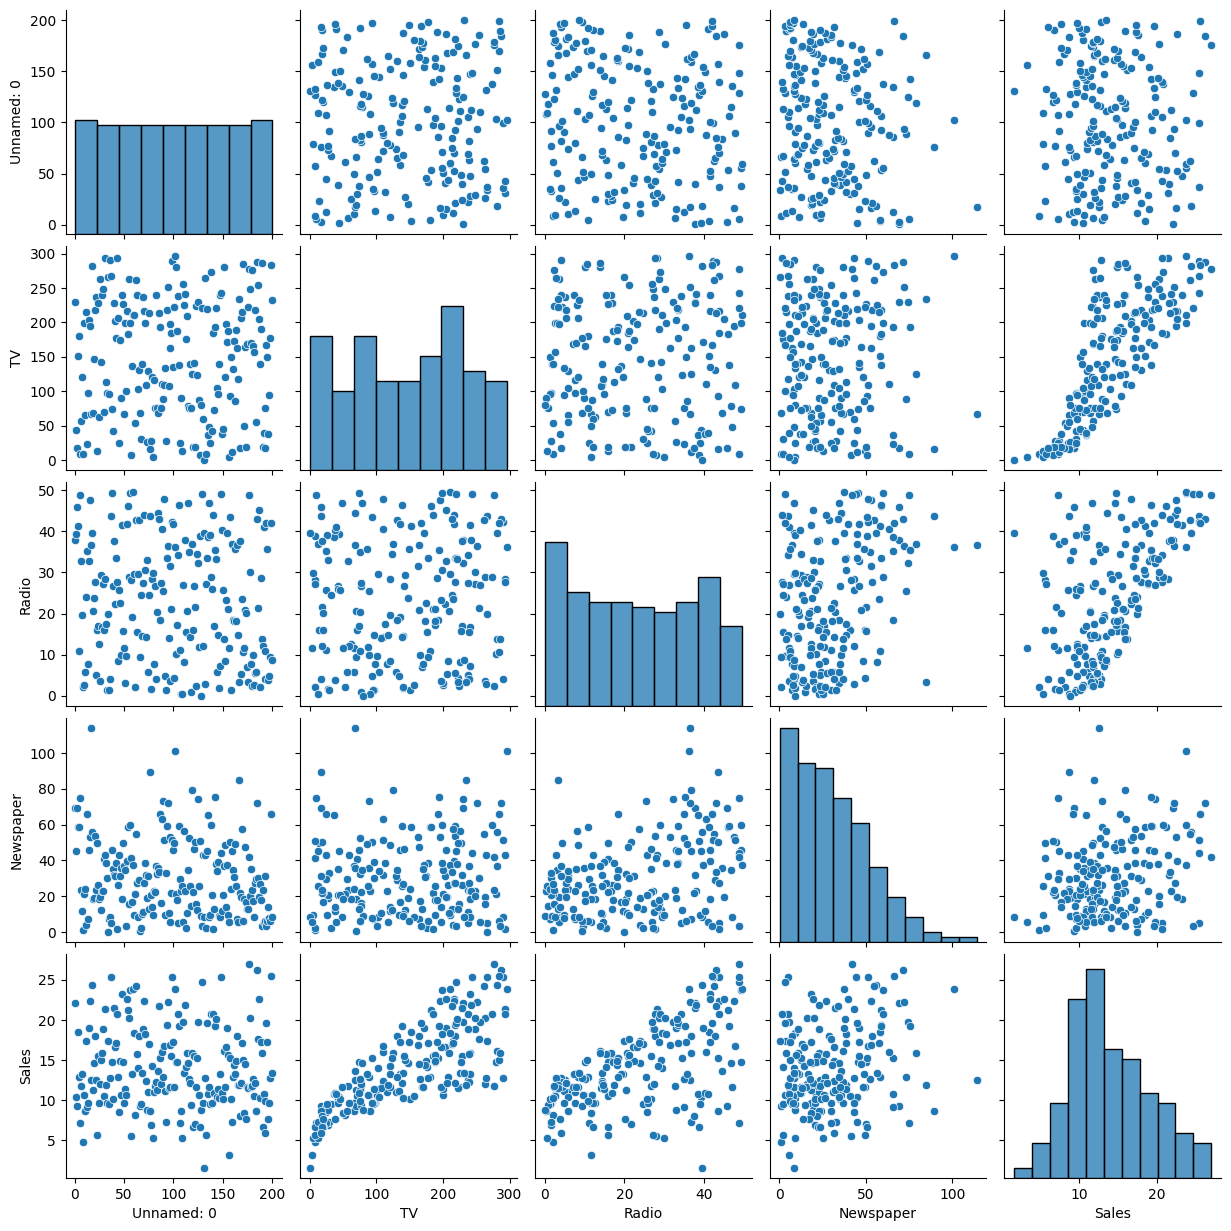

In [33]:
sns.pairplot(data = imdb_df)

#Step 4 : Breaking Dataset into 2 Parts

In [34]:
# Quantitative Variable (Numbers)
Quantitative_Variable = imdb_df[imdb_df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [35]:
# Qualitative Variable (Objects)
Qualitative_Variable = imdb_df[imdb_df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(5)

""
0
1
2
3
4


In [36]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,0


In [37]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,0,Unnamed: 0,TV,Radio,Newspaper,Sales
0,NaN,1,230.1,37.8,69.2,22.1
1,NaN,2,44.5,39.3,45.1,10.4
2,NaN,3,17.2,45.9,69.3,9.3
3,NaN,4,151.5,41.3,58.5,18.5
4,NaN,5,180.8,10.8,58.4,12.9


#Step 5 : Data Partition

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# define our input variable (X) & output variable
X = Final_combined.drop('TV', axis = 1)
Y = Final_combined[['TV']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=5729)

#Step 6 : Model building

In [ ]:
r2_score(y_test,y_predict)

0.5316989506286933